In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sea
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
df=pd.read_csv('airline_passenger_satisfaction.csv')

In [3]:
df.head().T

,0,1,2,3,4
ID,1,2,3,4,5
Gender,Male,Female,Male,Male,Female
Age,48,35,41,50,49
Customer Type,First-time,Returning,Returning,Returning,Returning
Type of Travel,Business,Business,Business,Business,Business
Class,Business,Business,Business,Business,Business
Flight Distance,821,821,853,1905,3470
Departure Delay,2,26,0,0,0
Arrival Delay,5.0,39.0,0.0,0.0,1.0
Departure and Arrival Time Convenience,3,2,4,2,3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,129880.0,64940.500000,37493.270818,1.0,32470.75,64940.5,97410.25,129880.0
Age,129880.0,39.427957,15.119360,7.0,27.00,40.0,51.00,85.0
Flight Distance,129880.0,1190.316392,997.452477,31.0,414.00,844.0,1744.00,4983.0
Departure Delay,129880.0,14.713713,38.071126,0.0,0.00,0.0,12.00,1592.0
Arrival Delay,129487.0,15.091129,38.465650,0.0,0.00,0.0,13.00,1584.0
Departure and Arrival Time Convenience,129880.0,3.057599,1.526741,0.0,2.00,3.0,4.00,5.0
Ease of Online Booking,129880.0,2.756876,1.401740,0.0,2.00,3.0,4.00,5.0
Check-in Service,129880.0,3.306267,1.266185,0.0,3.00,3.0,4.00,5.0
Online Boarding,129880.0,3.252633,1.350719,0.0,2.00,3.0,4.00,5.0
Gate Location,129880.0,2.976925,1.278520,0.0,2.00,3.0,4.00,5.0


In [6]:
df.shape

(129880, 24)

In [7]:
df.replace(0, np.nan, inplace=True)

In [8]:
df.isnull().sum()

ID                                            0
Gender                                        0
Age                                           0
Customer Type                                 0
Type of Travel                                0
Class                                         0
Flight Distance                               0
Departure Delay                           73356
Arrival Delay                             73146
Departure and Arrival Time Convenience     6681
Ease of Online Booking                     5682
Check-in Service                              1
Online Boarding                            3080
Gate Location                                 1
On-board Service                              5
Seat Comfort                                  1
Leg Room Service                            598
Cleanliness                                  14
Food and Drink                              132
In-flight Service                             5
In-flight Wifi Service                  

In [9]:
df['Flight Distance']=df['Flight Distance'].fillna(df['Flight Distance'].mean())
df['Departure Delay']=df['Departure Delay'].fillna(df['Departure Delay'].mean())
df['Arrival Delay']=df['Arrival Delay'].fillna(df['Arrival Delay'].mean())
df['Departure and Arrival Time Convenience']=df['Departure and Arrival Time Convenience'].fillna(df['Departure and Arrival Time Convenience'].mean())
df['Ease of Online Booking']=df['Ease of Online Booking'].fillna(df['Ease of Online Booking'].mean())
df['Check-in Service']=df['Check-in Service'].fillna(df['Check-in Service'].mean())
df['Online Boarding']=df['Online Boarding'].fillna(df['Online Boarding'].mean())
df['Gate Location']=df['Gate Location'].fillna(df['Gate Location'].mean())
df['On-board Service']=df['On-board Service'].fillna(df['On-board Service'].mean())
df['Seat Comfort']=df['Seat Comfort'].fillna(df['Seat Comfort'].mean())
df['Leg Room Service']=df['Leg Room Service'].fillna(df['Leg Room Service'].mean())
df['Cleanliness']=df['Cleanliness'].fillna(df['Cleanliness'].mean())
df['Food and Drink']=df['Food and Drink'].fillna(df['Food and Drink'].mean())
df['In-flight Service']=df['In-flight Service'].fillna(df['In-flight Service'].mean())
df['In-flight Wifi Service']=df['In-flight Wifi Service'].fillna(df['In-flight Wifi Service'].mean())
df['In-flight Entertainment']=df['In-flight Entertainment'].fillna(df['In-flight Entertainment'].mean())
df['Baggage Handling']=df['Baggage Handling'].fillna(df['Baggage Handling'].mean())

In [10]:
df.isnull().sum()

ID                                        0
Gender                                    0
Age                                       0
Customer Type                             0
Type of Travel                            0
Class                                     0
Flight Distance                           0
Departure Delay                           0
Arrival Delay                             0
Departure and Arrival Time Convenience    0
Ease of Online Booking                    0
Check-in Service                          0
Online Boarding                           0
Gate Location                             0
On-board Service                          0
Seat Comfort                              0
Leg Room Service                          0
Cleanliness                               0
Food and Drink                            0
In-flight Service                         0
In-flight Wifi Service                    0
In-flight Entertainment                   0
Baggage Handling                

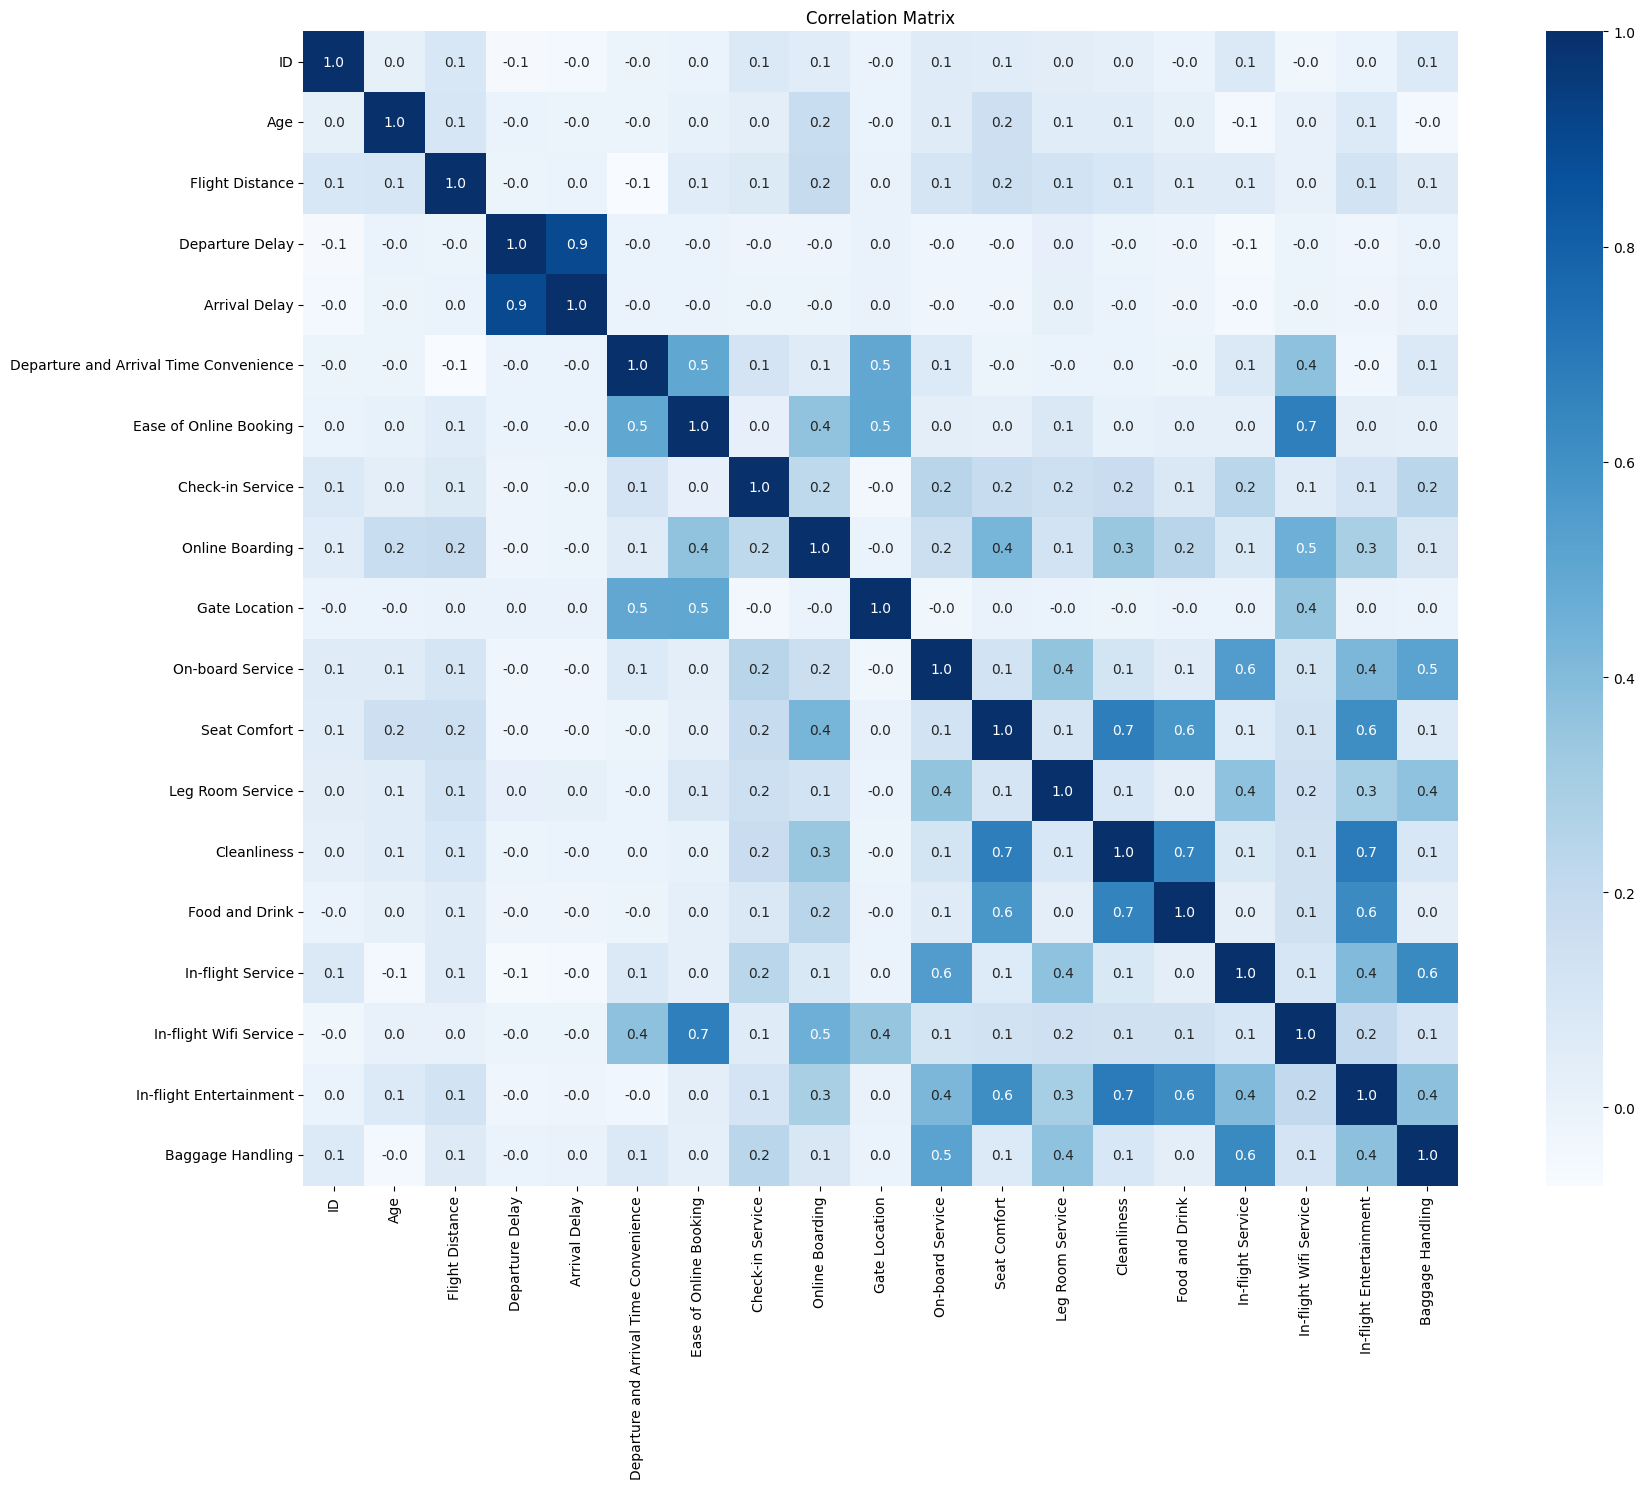

In [11]:
fig, ax = plt.subplots(figsize=(20, 15))
corr = df.iloc[:, 1:].corr()
heatmap = sea.heatmap(df.corr(), cbar=True, fmt='0.1f', annot_kws={'size': 10}, annot=True, square=True, cmap='Blues')
ax.set_title('Correlation Matrix')
plt.tight_layout()

In [12]:
df.columns

Index(['ID', 'Gender', 'Age', 'Customer Type', 'Type of Travel', 'Class',
       'Flight Distance', 'Departure Delay', 'Arrival Delay',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling', 'Satisfaction'],
      dtype='object')

In [13]:
Selected_Features=df[['On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling', 'Satisfaction']]

<AxesSubplot:xlabel='Satisfaction', ylabel='count'>

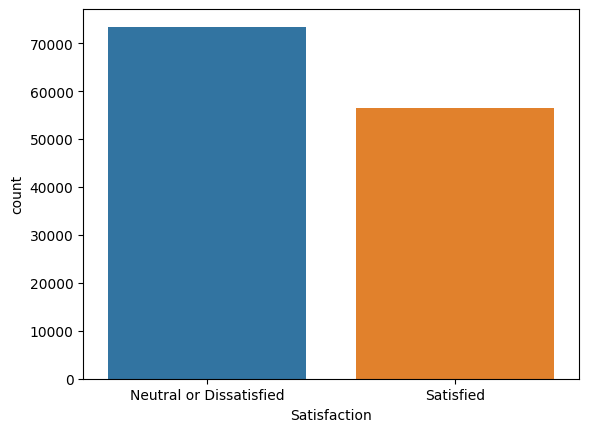

In [14]:
sea.countplot(x='Satisfaction', data=Selected_Features)

<AxesSubplot:title={'center':'Satisfaction rating based on Baggage Handling '}, xlabel='Satisfaction', ylabel='Baggage Handling'>

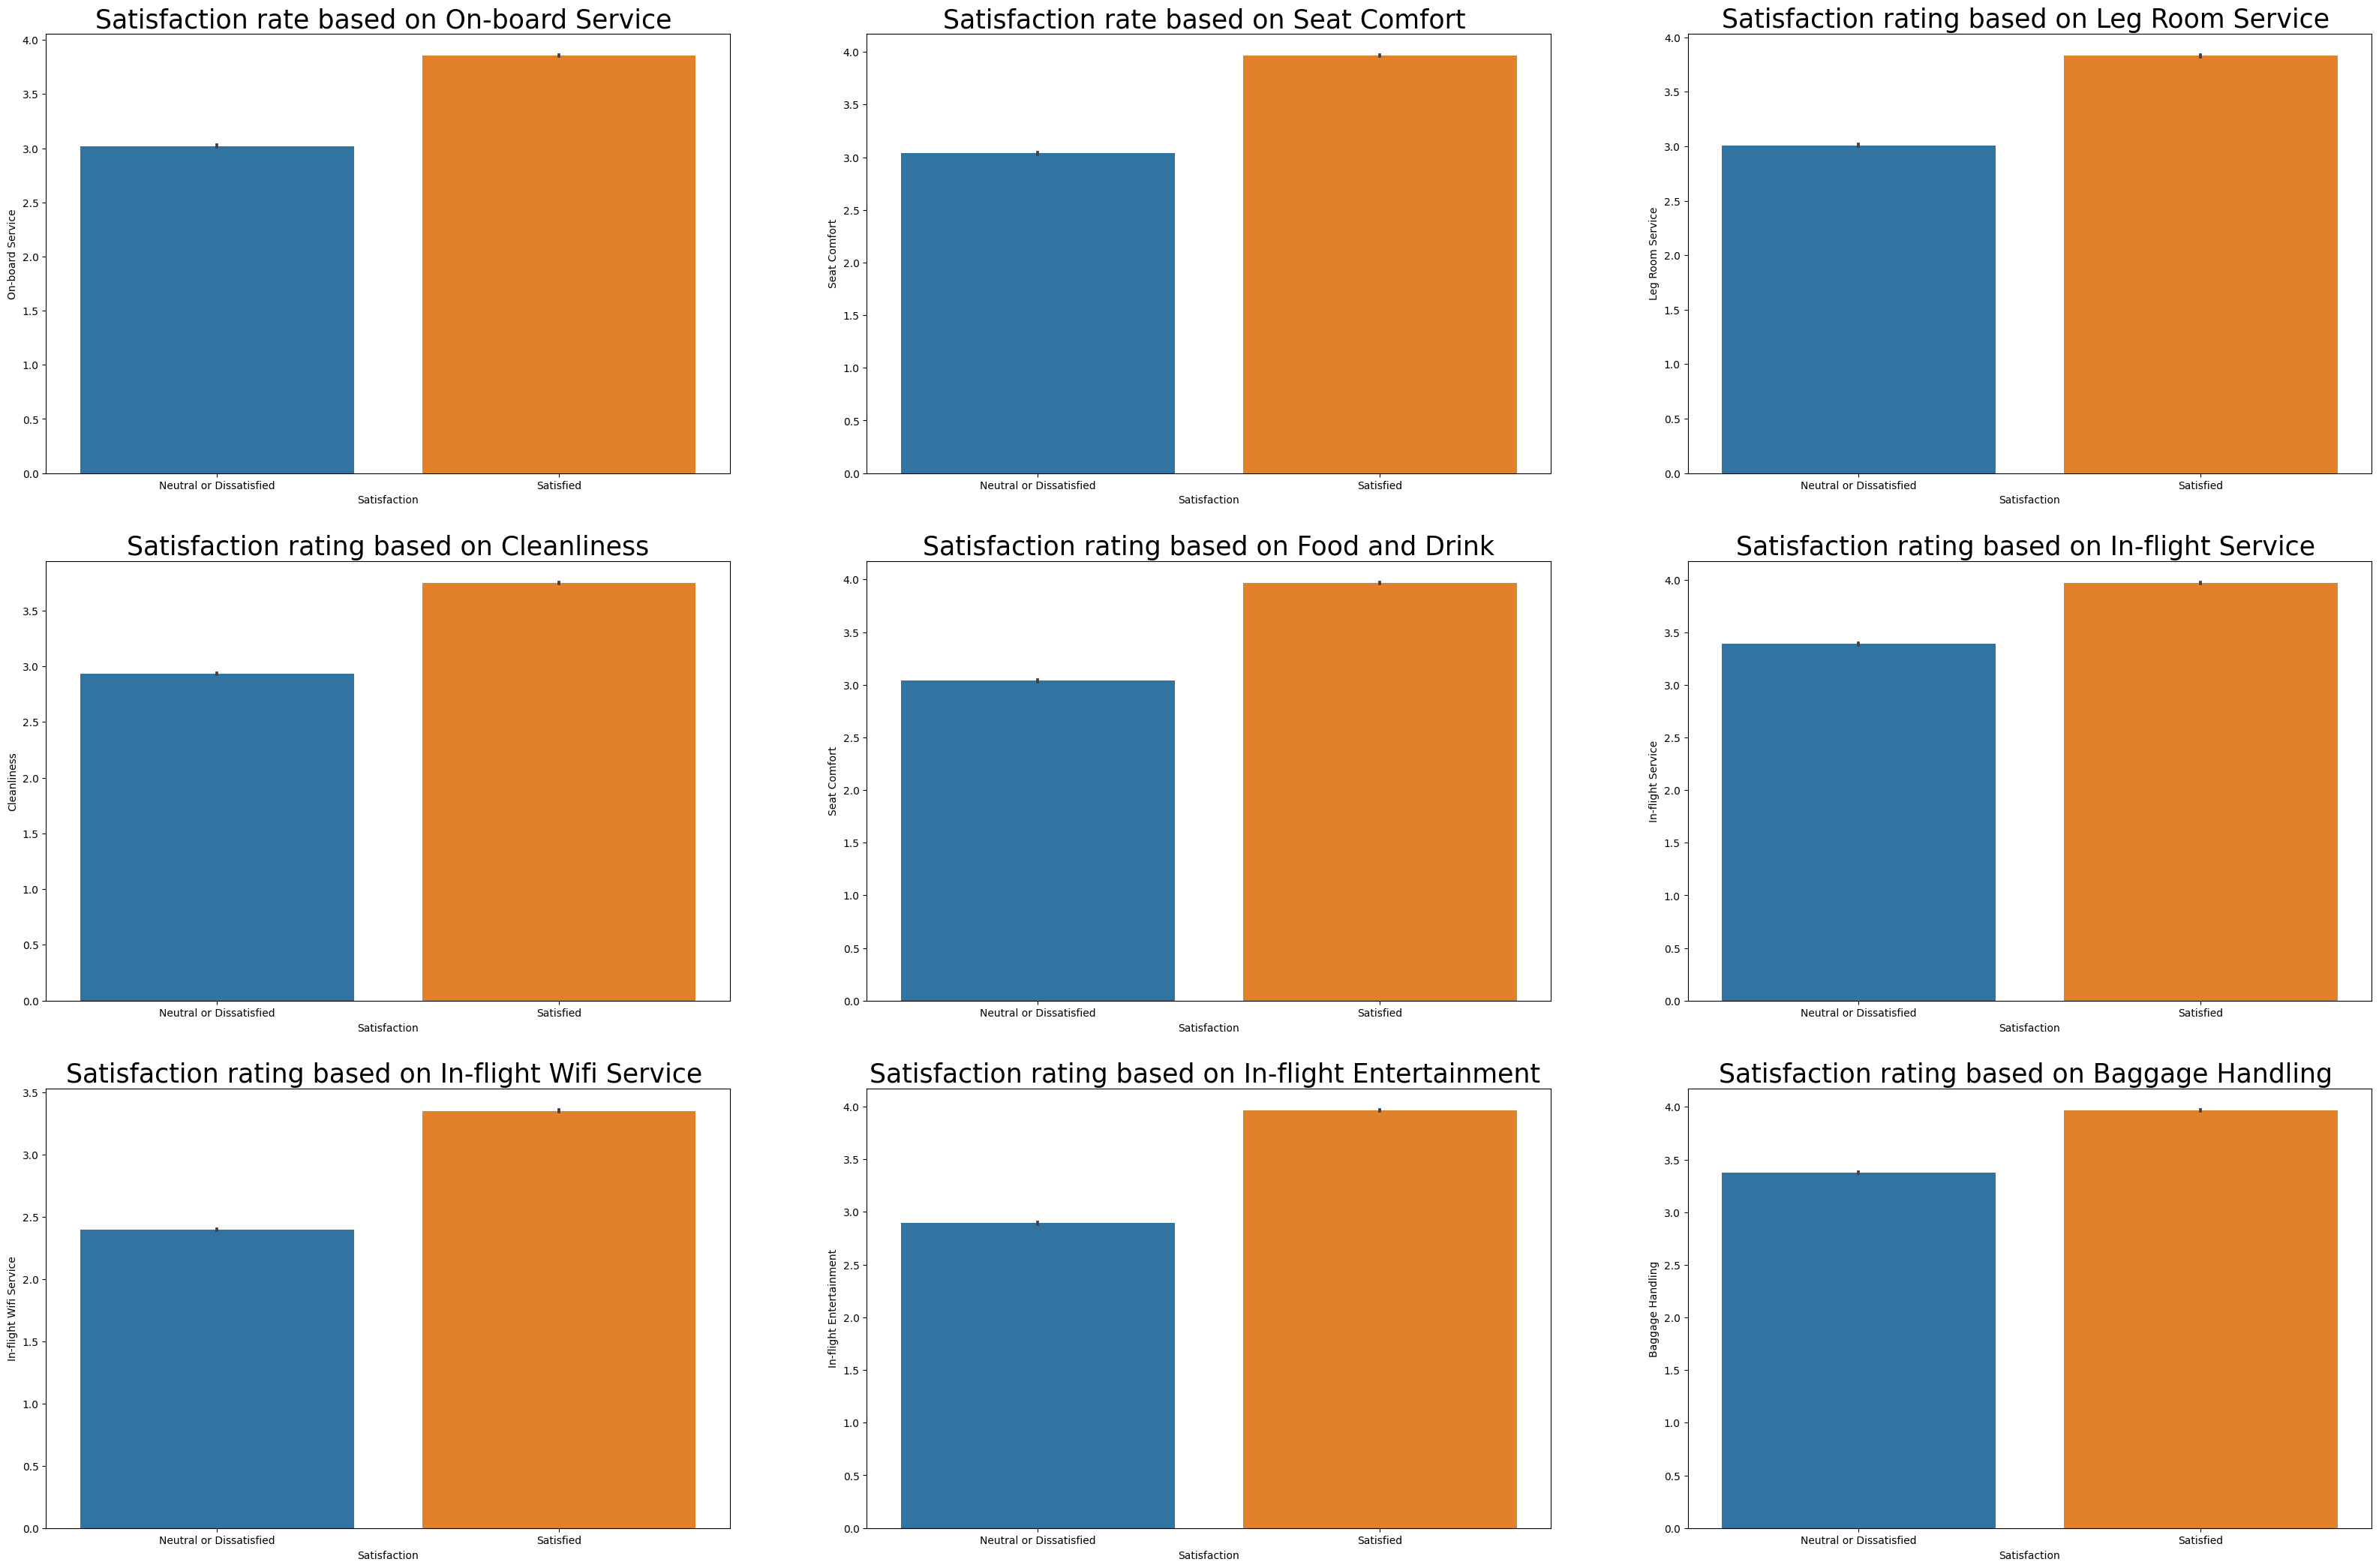

In [15]:
fig,ax =plt.subplots(figsize=(40,35))

plt.subplot(4,3,1)
plt.title("Satisfaction rate based on On-board Service ",fontsize=25)
sea.barplot(x="Satisfaction",y="On-board Service",data=Selected_Features)

plt.subplot(4,3,2)
plt.title("Satisfaction rate based on Seat Comfort ",fontsize=25)
sea.barplot(x="Satisfaction",y="Seat Comfort",data=Selected_Features)
plt.subplot(4,3,3)
plt.title("Satisfaction rating based on Leg Room Service ",fontsize=25)
sea.barplot(x="Satisfaction",y="Leg Room Service",data=Selected_Features)

plt.subplot(4,3,4)
plt.title("Satisfaction rating based on Cleanliness",fontsize=25)
sea.barplot(x="Satisfaction",y="Cleanliness",data=Selected_Features)

plt.subplot(4,3,5)
plt.title("Satisfaction rating based on Food and Drink",fontsize=25)
sea.barplot(x="Satisfaction",y="Seat Comfort",data=Selected_Features)

plt.subplot(4,3,6)
plt.title("Satisfaction rating based on In-flight Service ",fontsize=25)
sea.barplot(x="Satisfaction",y="In-flight Service",data=Selected_Features)

plt.subplot(4,3,7)
plt.title("Satisfaction rating based on In-flight Wifi Service ",fontsize=25)
sea.barplot(x="Satisfaction",y="In-flight Wifi Service",data=Selected_Features)

plt.subplot(4,3,8)
plt.title("Satisfaction rating based on In-flight Entertainment ",fontsize=25)
sea.barplot(x="Satisfaction",y="In-flight Entertainment",data=Selected_Features)

plt.subplot(4,3,9)
plt.title("Satisfaction rating based on Baggage Handling ",fontsize=25)
sea.barplot(x="Satisfaction",y="Baggage Handling",data=Selected_Features)






In [16]:
x=Selected_Features.iloc[:,0:-1]

In [17]:
y=Selected_Features.iloc[:,-1]

In [18]:
le = LabelEncoder()
y = le.fit_transform(y)

In [19]:
y

array([0, 1, 1, ..., 0, 1, 0])

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [21]:
scale=StandardScaler()
x_train= scale.fit_transform(x_train)
x_test= scale.transform(x_test)

In [22]:
LRclassifier=LogisticRegression()
LRclassifier.fit(x_train,y_train)

LogisticRegression()

In [23]:
y_pred=LRclassifier.predict(x_test)

[[11896  2827]
 [ 3367  7886]]


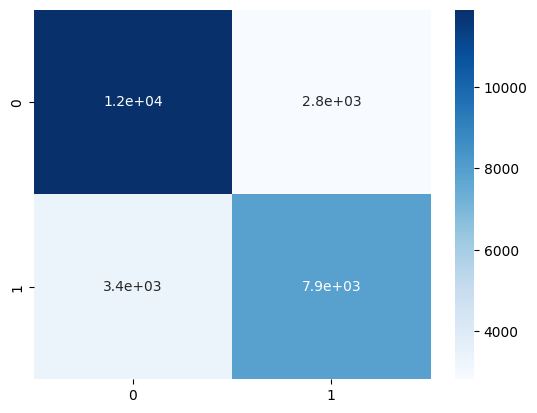

In [24]:
cf_matrix1 = confusion_matrix(y_test, y_pred)
print(cf_matrix1)
ax = sea.heatmap(cf_matrix1, annot=True, cmap='Blues')
plt.show()

In [25]:
accScoreLR=accuracy_score(y_test,y_pred)
print("accuracy:",accScoreLR*100)

accuracy: 76.15491222667077


In [26]:
reportLR=classification_report(y_test,y_pred)
print(reportLR)

              precision    recall  f1-score   support

           0       0.78      0.81      0.79     14723
           1       0.74      0.70      0.72     11253

    accuracy                           0.76     25976
   macro avg       0.76      0.75      0.76     25976
weighted avg       0.76      0.76      0.76     25976



In [27]:
DTclassifier=DecisionTreeClassifier(max_depth = 10)
DTclassifier.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10)

In [28]:
y_pred2=DTclassifier.predict(x_test)

[[13388  1335]
 [ 2074  9179]]


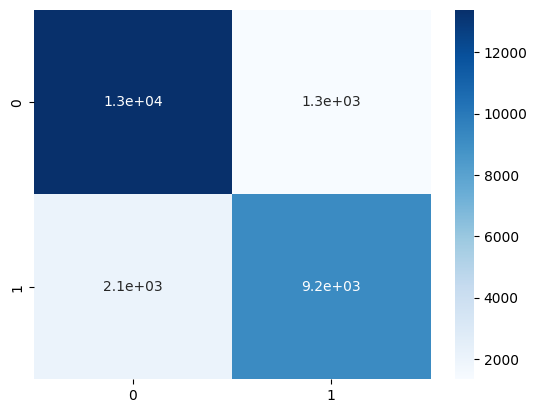

In [29]:
cf_matrix2 = confusion_matrix(y_test, y_pred2)
print(cf_matrix2)
ax = sea.heatmap(cf_matrix2, annot=True, cmap='Blues')
plt.show()

In [30]:
accScoreDT=accuracy_score(y_test,y_pred2)
print("accuracy:",accScoreDT*100)

accuracy: 86.87634739759778


In [31]:
reportDT=classification_report(y_test,y_pred2)
print(reportDT)

              precision    recall  f1-score   support

           0       0.87      0.91      0.89     14723
           1       0.87      0.82      0.84     11253

    accuracy                           0.87     25976
   macro avg       0.87      0.86      0.87     25976
weighted avg       0.87      0.87      0.87     25976



In [32]:
RFClassifier=RandomForestClassifier(n_estimators=100,criterion='entropy')
model=RFClassifier.fit(x_train,y_train)

In [33]:
y_pred3=RFClassifier.predict(x_test)

[[13388  1335]
 [ 2074  9179]]


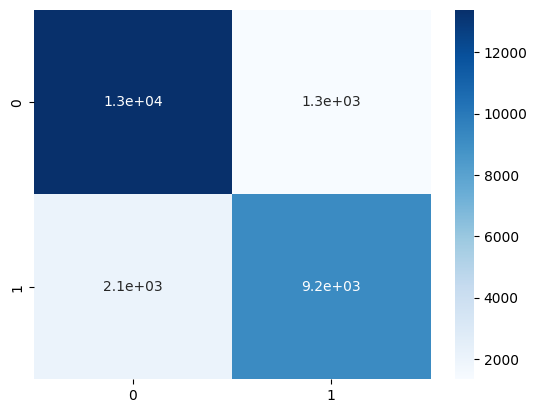

In [34]:
cf_matrix3 = confusion_matrix(y_test, y_pred2)
print(cf_matrix3)
ax = sea.heatmap(cf_matrix3, annot=True, cmap='Blues')
plt.show()

In [35]:
accScoreRF=accuracy_score(y_test,y_pred3)
print("accuracy:",accScoreRF*100)

accuracy: 88.92824145364952


In [36]:
reportRF=classification_report(y_test,y_pred3)
print(reportRF)

              precision    recall  f1-score   support

           0       0.88      0.93      0.90     14723
           1       0.90      0.84      0.87     11253

    accuracy                           0.89     25976
   macro avg       0.89      0.88      0.89     25976
weighted avg       0.89      0.89      0.89     25976



In [37]:
import pickle 

In [38]:
filename = 'trained_model.sav'
pickle.dump(RFClassifier,open(filename,'wb'))

In [39]:
loaded_model =pickle.load(open('trained_model.sav','rb'))

In [40]:
input_data =(1,2,3,4,5,3,4,5,5)
input_data_as_np=np.asarray(input_data)
input_data_reshaped = input_data_as_np.reshape(1,-1)
prediction=loaded_model.predict(input_data_reshaped)
print(prediction)
if(prediction[0]==0):
    print('Not Satisfied')
else:
    print('Sastified')

[1]
Sastified
